<a id="primero"></a>
## 1. Calidad de un vino
---

Existen muchas variedades de vino existentes debido a los distintos gustos que tienen las personas. Del gusto se desprende la calidad que una persona le podría asignar a un vino, el cual proviene del gusto de la persona en particular, o bien, a la gran cantidad de quı́micos y procesos que se aplican a la producción de vino. Para el área de negocios, el estimar cuál es la calidad de un vino en base a la apreciación del público es una tarea bastante difı́cil.  
Para esta actividad se trabajará con dos *datasets* asociados a las variantes tinto y blanco del vino portugués
”Vinho Verde”[[1]](#refs). Debido a temas privados solo se cuenta con las caracterı́stcas fisioquı́micas asociadas a un
vino en particular, los cuales corresponden a 11 atributos numéricos descritos en el siguiente __[link](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names)__.

Este problema puede ser abordado como clasificación de 11 clases o de regresión, ya que el atributo a estimar,
*quality*, tiene un dominio como valor entero 0 y 10. La forma de resolverlo será a través de **ensamblados**.

<img src="https://uploads.toptal.io/blog/image/92064/toptal-blog-image-1454584112948-fc1d35939aa1886bf30c816b3ac20e21.jpg" title="Title text" width="20%"  />


> a) Carge los dos dataset en un único dataframe de pandas, además de agregar una columna indicando si es vino tinto o blanco. Describa el dataset a trabajar.


In [73]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.metrics import f1_score
import collections
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier


In [2]:

df_red = pd.read_csv("winequality-red.csv",sep=";")

df_white = pd.read_csv("winequality-white.csv",sep=";")



En primer lugar veremos la estructura del dataframe de Vinos rojos y blancos para apreciar su estructura:

In [3]:
df_red.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [4]:
df_white.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


Ahora se agregará un atributo llamado Type que corresponda con un 0 si es vino rojo y un 1 si es blanco.

In [6]:
df_red["Type"] = 0 #Le otorga valor 0 a todas las filas de la columna type
df_white["Type"] = 1#analogo a lo anterior.
df = pd.concat([df_red,df_white], axis=0) #Hace un Join

A continuación se muestra el resultado final de la tabla

In [7]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0


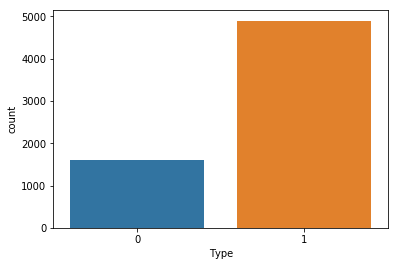

In [8]:
data = sns.countplot(x="Type", data=df)

In [9]:
df["Type"].value_counts()

1    4898
0    1599
Name: Type, dtype: int64

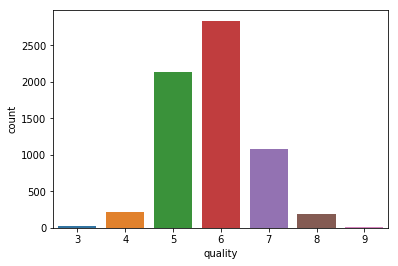

In [10]:
data = sns.countplot(x='quality', data=df)

Estamos trabajando con un conjuntos de datos que describen las distintas caracteríasticas químicas de los vinos. Este problema pide predecir la calidad de un vino dada sus carácterísticas.
Las categorías de vinos no estan balanceado como se puede ver en el gráfico anterior, más aún no todas las categorías estan presentes. Cada dato posee 13 carácteristicas, el tipo de vino que acabamos de agregar y la calidad del vino.


> b) Aborde este problema como si fuera de clasificación con multiples clases para predecir el valor de calidad de un vino, es decir, utilice las distintas caracterı́sticas fisioquı́micas presentes en los datos para estimar la etiqueta ¿Cuántas clases son y cuántos ejemplos hay por clase? ¿Qué sucede con predecir si un vino tiene calidad mínima (0) o máxima(10)? Además para el propósito académico de esta actividad cree un conjunto de pruebas (20%)  para evaluar la generalización final del modelo y otro de validación (20%) si estima conveniente. 


In [12]:
y = df["quality"].values 

x = df
x.drop("quality",axis=1,inplace=True)


#train and test split over df

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)#train and test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)#train and val

In [22]:
print('Val') 
print(collections.Counter(y_val))
print('Train') 
print(collections.Counter(y_train))
print('Test') 
print(collections.Counter(y_test))


Val
Counter({6: 1003, 5: 746, 7: 369, 4: 72, 8: 71, 3: 10, 9: 3})
Train
Counter({6: 939, 5: 779, 7: 395, 4: 75, 8: 73, 3: 11, 9: 1})
Test
Counter({6: 894, 5: 613, 7: 315, 4: 69, 8: 49, 3: 9, 9: 1})


Las categorias no solo no estan balanceadas, sinó que ademas hay categorías que no estan representadas, la 0,1,2 y 10. Esto trae el problema de que la maquina no sabaría como categorizar un dato que pertenezca a estas categorías. Una solución sería intentar que el programa aprenda que un dato mejor evaluado que 8 puede estar las categorias 9 y 10, considerando que en este caso las categorias si tienen un orden de cercanía, pero el problema radica en definir que es mejor y recordar que la combinación no es lineal.

Siguiendo esta idea se puede plantear una interpolación para definir el dominio teórico de las categorías faltantes, de esta forma categorizar los datos según su cercania a estos dominios. 


> c) Entrene un solo Árbol de Clasificación de múltiples niveles para resolver el problema. Defina un Árbol **no regularizado** (como el que no tiene límites en su profundidad) y otro Árbol **regularizado** (variando los hiper-parámetros que prefiera, por ejemplo, los más comunes como la profundidad, el número mínimo de datos para realizar *split* o el número mínimo de datos en cada hoja), recuerde que las **decisiones** no pueden ser basadas mirando el conjunto de pruebas. Debido al desbalanceo que se produce en las clases mida la métrica F1-score [[2]](#refs) sobre el conjunto de entrenamiento y de pruebas.


La métric F1 score  es equivalente a 2 * (precision * recall) / (precision + recall), donde la precisión son los datos correctamente etiquetados versus el total de los datos, y el recall es la información recuperada, en terminos sencillos los verdaderos positivos partidos por la suma de los falsos negativos y los verdaderos positivos. Esta métrica es util para evaluar problemas de multi-label. 
El parámetro average='micro' determina el score resultante de la metrica global, sobre todas las etiquetas.


A continuación se adjunta el árbol sin límites de profundidad ( por default incluye esa opcion predeterminadamente).


In [24]:
model = Tree()
model.fit(X_train,y_train)
print("Train F1 = ", f1_score(y_train, model.predict(X_train), average='micro'))
print("Validation F1 = ", f1_score(y_val, model.predict(X_val), average='micro'))
print("Test F1 = ", f1_score(y_test, model.predict(X_test), average='micro'))

Train F1 =  1.0
Validation F1 =  0.4872471416007036
Test F1 =  0.5056410256410256


A continuación se adjunta el árbol y se estudia su desempeño según profundidad.


In [28]:
#classes_weights = {9: 537, 3: 94.5,8:14.69,4:13.13,7: 2.63, 5:1.32,6:0.5 } # Fracaso
accsup = 0
acc = 0
depth = 0
acctest = 0
suptest = 0
depthtest = 0

i_n=[]
score_test=[]
score_train=[]
score_val=[]

for i in range(100):


    model = Tree(criterion='gini', splitter='best', max_depth=i+1, min_samples_split=2, min_samples_leaf=1, 
                 min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                 min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
    model.fit(X_train,y_train)
    acc = f1_score(y_val, model.predict(X_val), average='micro')
    acctest =f1_score(y_test, model.predict(X_test), average='micro')
    
    score_val.append(acc)
    score_test.append(acctest)
    score_train.append(f1_score(y_train, model.predict(X_train), average='micro'))
    i_n.append(i+1)
    if acctest>suptest:
        suptest=acctest
        depthtest= i+1
    
    if acc>accsup:
        accsup=acc
        depth = i+1
 
print("Train F1 = ", f1_score(y_train, model.predict(X_train), average='micro'))

print("Test F1 = ", suptest, '\n', 'profundidad', depthtest )
print('Validation F1:', accsup, '\n', 'profundidad:', depth, )


Train F1 =  1.0
Test F1 =  0.5333333333333333 
 profundidad 5
Validation F1: 0.5246262093227793 
 profundidad: 10


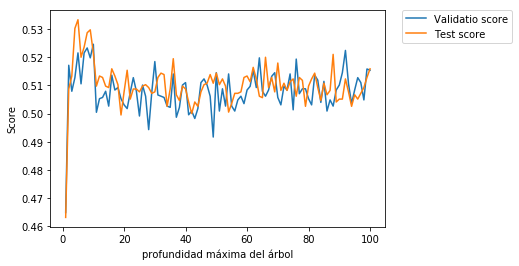

In [29]:
plt.plot(i_n, score_val, label='Validatio score')
plt.plot(i_n, score_test, label='Test score')
#plt.plot(i_n, score_train, label='Training Accuary')

plt.xlabel('profundidad máxima del árbol')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

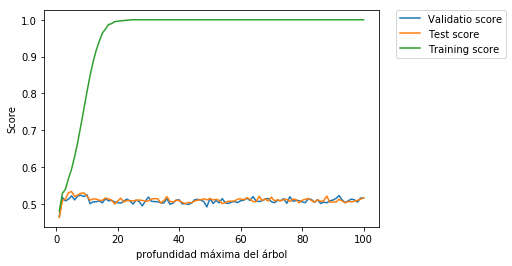

In [30]:
plt.plot(i_n, score_val, label='Validatio score')
plt.plot(i_n, score_test, label='Test score')
plt.plot(i_n, score_train, label='Training score')

plt.xlabel('profundidad máxima del árbol')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

El score de entrenamiento converge rápidamente al 100%, sin embargo score de prueba no sufre de overfitting.
En base al resultado de profundidad encontrados, usamos los resultados del testeo para ajustar alguno parametros posteriores

In [42]:
accsup2 = 0
acc2 = 0
split = 0
acctest2 = 0
suptest2 = 0
testsplit = 0

i_2=[]
score_test=[]
score_train=[]
score_val=[]

for i in range(4):
    model = Tree(criterion='gini', splitter='best', max_depth=depthtest, min_samples_split=i+2, min_samples_leaf=1,
             min_weight_fraction_leaf=0.0, max_features=4, random_state=0, max_leaf_nodes=None, 
             min_impurity_decrease=0.0, min_impurity_split=0, class_weight=None, presort=True)
    model.fit(X_train,y_train)    

    acc2 = f1_score(y_val, model.predict(X_val), average='micro')
    acctest2 =f1_score(y_test, model.predict(X_test), average='micro')
    
    score_val.append(acc2)
    score_test.append(acctest2)
    score_train.append(f1_score(y_train, model.predict(X_train), average='micro'))
    i_2.append(i+1)
    if acctest2>suptest2:
        suptest2=acctest2
        testsplit= i+2
    
    if acc2>accsup2:
        accsup2=acc2
        split = i+2

print("Train score = ", f1_score(y_train, model.predict(X_train), average='micro'))

print("Test score = ", suptest2, '\n', 'Samples per split', testsplit )
print('Validation score:', accsup2, '\n', 'Samples per split:', split, )


Train score =  0.5618125824901012
Test score =  0.517948717948718 
 Samples per split 2
Validation score: 0.5215479331574319 
 Samples per split: 2


C:\Users\rosar\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\rosar\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\rosar\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\rosar\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


Se determinan los hiperparametros como maxdepth = 5, max feature = 4 y min samples split = 2.
Todos los demas parametros se dejan por defecto.

> d) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **Bagging**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en c)*) ¿Qué debería suceder? ¿Se visualiza *overfitting*? Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.


In [57]:
%%time


f1regtest = 0
f1regtrain = 0
f1test = 0
f1train = 0

supregtest = 0
supregtrain = 0
suptest = 0
suptrain = 0

estregtest = 0
estregtrain = 0
esttest = 0
esttrain = 0


i_3=[]
s_b_r_test=[]
s_b_r_train=[]
s_b_r_val=[]
s_b_test=[]
s_b_train=[]
s_b_val=[]

for i in range(100):
    modelreg = BaggingClassifier(base_estimator=Tree(max_depth=depthtest, min_samples_split =2, max_features=4), n_estimators=i+1, n_jobs=-1)
    modelreg.fit(X_train,y_train)   
    
    f1regtest = f1_score(y_test, modelreg.predict(X_test), average='micro')
    s_b_r_test.append( f1regtest)
    f1regtrain= f1_score(y_train, modelreg.predict(X_train), average='micro')
    s_b_r_train.append(f1regtrain)
#    s_b_r_val.append()
    
    model = BaggingClassifier(base_estimator=Tree(), n_estimators=i+1, n_jobs=-1)
    model.fit(X_train,y_train)   
    
    f1test = f1_score(y_test, model.predict(X_test), average='micro')
    s_b_test.append(f1test)
    f1train = f1_score(y_train, model.predict(X_train), average='micro')
    s_b_train.append(f1train)
 #   s_b_val.append()
    
    i_3.append(i+1)
    if f1regtest>supregtest:
        supregtest=f1regtest
        estregtest = i+1
 
    if f1regtrain>supregtrain:
        supregtrain=f1regtrain
        estregtrain = i+1
  
    if f1test>suptest:
        suptest=f1test
        esttest = i+1
 
    if f1train>suptrain:
        suptrain=f1train
        esttrain = i+1


print ('score reg test:', supregtest, 'N_estimadores:', estregtest)
print ('score reg train:', supregtrain, 'N_estimadores:', estregtrain)
print ('score test:', suptest, 'N_estimadores:', esttest)
print ('score train:', suptrain, 'N_estimadores:', esttrain)



score reg test: 0.5697435897435897 N_estimadores: 35
score reg train: 0.6198856137263529 N_estimadores: 48
score test: 0.622051282051282 N_estimadores: 78
score train: 1.0 N_estimadores: 28
Wall time: 22min 35s


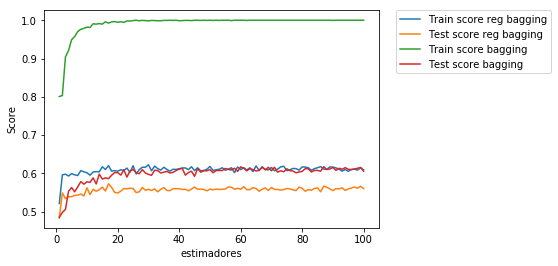

In [54]:

plt.plot(i_3, s_b_r_train, label='Train score reg bagging')
plt.plot(i_3, s_b_r_test, label='Test score reg bagging')
plt.plot(i_3, s_b_train, label='Train score bagging')
plt.plot(i_3, s_b_test, label='Test score bagging')

plt.xlabel('estimadores')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Por lo visto en los dos items anteriores, se puede notar que no ocurre overfitting ya que el score de testeo se mantiene oscilando al rededor de un valor central.
Además se aprecia que los resultados del testeo de árboles no regularizados tiene un mejor desempeño que los regularizados. Lo que tambien es esperado según los estudiado en el curso.

> e) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **AdaBoost**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en c)* ¿Se visualiza *overfitting*? ¿Qué técnica se utiliza, *re-muestrear* o *pesar* ejemplos? ¿Qué le parece más sensato?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).


In [87]:
%%time

f1adaregtest = 0
f1adaregtrain = 0
f1adatest = 0
f1adatrain = 0

supadaregtest = 0
supadaregtrain = 0
supadatest = 0
supadatrain = 0

estadaregtest = 0
estadaregtrain = 0
estadatest = 0
estadatrain = 0

i_4=[]
s_a_r_test=[]
s_a_r_train=[]
s_a_r_val=[]
s_a_test=[]
s_a_train=[]
s_a_val=[]


for i in range (200):
    adareg = AdaBoostClassifier(base_estimator = Tree(max_depth=depthtest, min_samples_split =2, max_features=4), n_estimators=i+1)
    adareg.fit(X_train,y_train)   
    
    f1adaregtest = f1_score(y_test, adareg.predict(X_test), average='micro')
    s_a_r_test.append( f1adaregtest)
    f1adaregtrain= f1_score(y_train, adareg.predict(X_train), average='micro')
    s_a_r_train.append(f1adaregtrain)
    
    ada = AdaBoostClassifier(base_estimator = Tree(), n_estimators=i+1)
    ada.fit(X_train,y_train)
    
    f1adatest = f1_score(y_test, ada.predict(X_test), average='micro')
    s_a_test.append(f1adatest)
    f1adatrain = f1_score(y_train, ada.predict(X_train), average='micro')
    s_a_train.append(f1adatrain)    
    
    i_4.append(i+1)
    if f1adaregtest>supadaregtest:
        supadaregtest=f1adaregtest
        estadaregtest = i+1
 
    if f1adaregtrain>supadaregtrain:
        supadaregtrain=f1adaregtrain
        estadaregtrain = i+1
  
    if f1adatest>supadatest:
        supadatest=f1adatest
        estadatest = i+1
 
    if f1adatrain>supadatrain:
        supadatrain=f1adatrain
        estadatrain = i+1



print ('score reg test:', supadaregtest, 'N_estimadores:', estadaregtest)
print ('score reg train:', supadaregtrain, 'N_estimadores:', estadaregtrain)
print ('score test:', supadatest, 'N_estimadores:', estadatest)
print ('score train:', supadatrain, 'N_estimadores:', estadatrain)
        

score reg test: 0.5558974358974359 N_estimadores: 135
score reg train: 0.7866256049274089 N_estimadores: 197
score test: 0.5235897435897436 N_estimadores: 143
score train: 1.0 N_estimadores: 1
Wall time: 3min 38s


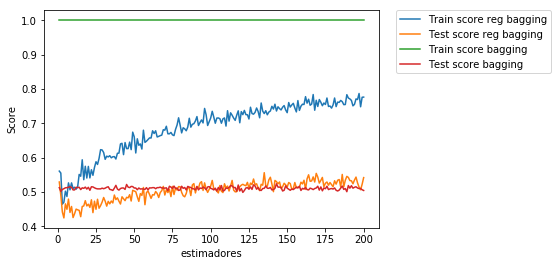

In [88]:

plt.plot(i_4, s_a_r_train, label='Train score reg bagging')
plt.plot(i_4, s_a_r_test, label='Test score reg bagging')
plt.plot(i_4, s_a_train, label='Train score bagging')
plt.plot(i_4, s_a_test, label='Test score bagging')

plt.xlabel('estimadores')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Por lo visto al aumentar los estimadores, el score de training y test regularizados aumenta, aunque score de test regularizado aumenta lentamente, se demora en alcanzar el valor medio del no regularizado, pero sin embargo el regularizado termina desempeñandose mejor que el no regularizado, se estima que si se sigue aumentando el numero de estimadores, su desempeño podría aumentar aún más.


> f) Pruebe otra técnica de ensamblado dedicada a árboles de decisión, que combina el muestreo *boostrap* de *Bagging* con muestreo sobre las *features*: **Random Forest**, compare el Árbol **no regularizado** con el **regularizado** ¿Se visualiza *overfitting*?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen el F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.


In [76]:


%%time

f1rfregtest = 0
f1rfregtrain = 0
f1rftest = 0
f1rftrain = 0

suprfregtest = 0
suprfregtrain = 0
suprftest = 0
suprftrain = 0

estrfregtest = 0
estrfregtrain = 0
estrftest = 0
estrftrain = 0

i_5=[]
s_rf_r_test=[]
s_rf_r_train=[]
s_rf_r_val=[]
s_rf_test=[]
s_rf_train=[]
s_rf_val=[]

for i in range(100):
    
    RFreg = RandomForestClassifier(n_estimators=i+1, max_depth=depthtest ,n_jobs=-1)
    RFreg.fit(X_train,y_train)      
    RF = RandomForestClassifier(n_estimators=i+1, max_depth=depthtest ,n_jobs=-1)
    RF.fit(X_train,y_train)     
 
    
    f1rfregtest = f1_score(y_test, RFreg.predict(X_test), average='micro')
    s_rf_r_test.append( f1adaregtest)
    f1rfregtrain= f1_score(y_train, RFreg.predict(X_train), average='micro')
    s_rf_r_train.append(f1rfregtrain)
    
    f1rftest = f1_score(y_test, RF.predict(X_test), average='micro')
    s_rf_test.append(f1adatest)
    f1rftrain = f1_score(y_train, RF.predict(X_train), average='micro')
    s_rf_train.append(f1rftrain)    
    
    i_5.append(i+1)
    if f1rfregtest>suprfregtest:
        suprfregtest=f1rfregtest
        estrfregtest = i+1
 
    if f1rfregtrain>suprfregtrain:
        suprfregtrain=f1adaregtrain
        estrfregtrain = i+1
  
    if f1rftest>suprftest:
        suprftest=f1rftest
        estrftest = i+1
 
    if f1rftrain>suprftrain:
        suprftrain=f1rftrain
        estrftrain = i+1
    

#    rand_tree_reg= RandomForestClassifier(n_estimators=i, max_depth=depth,n_jobs=-1,criterio='', M "muestreo de parámetros")

print ('score reg test:', suprfregtest, 'N_estimadores:', estrfregtest)
print ('score reg train:', suprfregtrain, 'N_estimadores:', estrfregtrain)
print ('score test:', suprftest, 'N_estimadores:', estrftest)
print ('score train:', suprftrain, 'N_estimadores:', estrftrain)
        

score reg test: 0.5692307692307692 N_estimadores: 97
score reg train: 0.7501099868015838 N_estimadores: 1
score test: 0.5723076923076923 N_estimadores: 59
score train: 0.6198856137263529 N_estimadores: 80
Wall time: 1min 26s


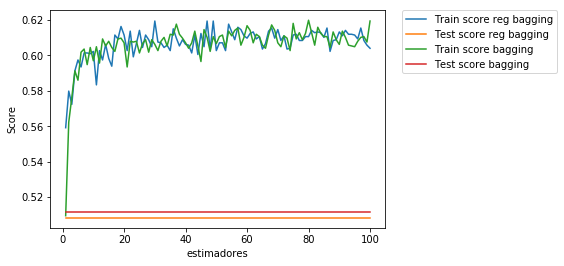

In [80]:
plt.plot(i_5, s_rf_r_train, label='Train score reg bagging')
plt.plot(i_5, s_rf_r_test, label='Test score reg bagging')
plt.plot(i_5, s_rf_train, label='Train score bagging')
plt.plot(i_5, s_rf_test, label='Test score bagging')

plt.xlabel('estimadores')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

El resultado obtenido es anómalo, independiente del desempeño entregado, por lo visto hasta ahora, los desempeños de test no deberían ser constantes, deberían oscilar con una tendencia central, es necesario revisar el modelo.

> g) Verifique que el **OOB error** (*out of bag error*) de los ensambladores que utilizan la técnica *boostrap* puede ser una alternativa como métrica de generalización, compárelo con el error calculado sobre el conjunto de pruebas y validación (o en su defecto *cross validation*).


In [81]:
oob_error = 1 - model.oob_score
test_error = 1- model.score(X_test,y_test)
val_error = 1- model.score(X_val,y_val)
print("OOB error: ",oob_error)
print ("Val error: ",val_error)
print("Test error: ",test_error)

OOB error:  1
Val error:  0.3874230430958663
Test error:  0.3902564102564102


> h) Entrene alguna otra máquina de aprendizaje, elegida por usted de entre todas las vistas en el curso, para resolver el problema. Elija los hiper-parámetros que estime convenientes intentando aumentar el *F1-scor*e obtenido por los algoritmos anteriores ¿Se logra una mejora? ¿Por qué?


> i) Compare y analice las distintas maneras con las que se resolvió el problema definido en b), por ejemplo incluya las decisiones que conlleva y los resultados que reflejan.


> j) Defina otra forma de combinar los valores que entregan los ensamblados al hacer predicciones y compare con lo que se hace actualmente, por ejemplo *Bagging* realiza el voto de la mayoría para clasificación y promedio para regresión, *AdaBoost* realiza una combinación ponderada de cada clasificador dependiendo de su *habilidad* (desempeño para clasificar el conjunto de entrenamiento).


In [ ]:
```python
def combine_predictions(predictions):
    return #define !
list_estimators = model.estimators_
list_predictions = [estimator.predict(X_test) for estimator in list_estimators]
new_predictions = combine_predictions(list_predictions)
...#measure f1 score
f1_score(y_test, new_predictions)

> k) Utilice la técnica de ensamblado para seleccionar características, para ésto defina un criterio para estimar la importancia de los distintos atributos en el ensamblado, impleméntelo sobre alguno de los ensambladores entrenados para resolver el problema definido en b). Realice un *ranking* de importancia de atributos y seleccione las $k$ características más relevantes.


> l) Entrene la máquina de aprendizaje definida en h) sobre las $k$ carecterísticas derivadas del punto anterior ¿Mejora los resultados sobre ésta máquina de aprendizaje?
